# The equations are:

### $x_{n+1} = (1-\beta)L(x_n) + {\beta}L(y_n)$
### $y_{n+1} = {\beta}L(x_n) + (1-\beta)L(y_n)$

where:

 - $n$ = 0, 1, 2, ...
 - $L(x) = {\alpha}x(1-x)$ is the logistics map
 - ${\beta} = (0 \leq {\beta} \leq 0.5)$ is the coupline parameter

We need to verify that for $alpha$ = 2.9, the logistics map has two fixed points, viz: 0 and $(\frac{{\alpha}-1}{\alpha})$

Here is the code to generate the values:

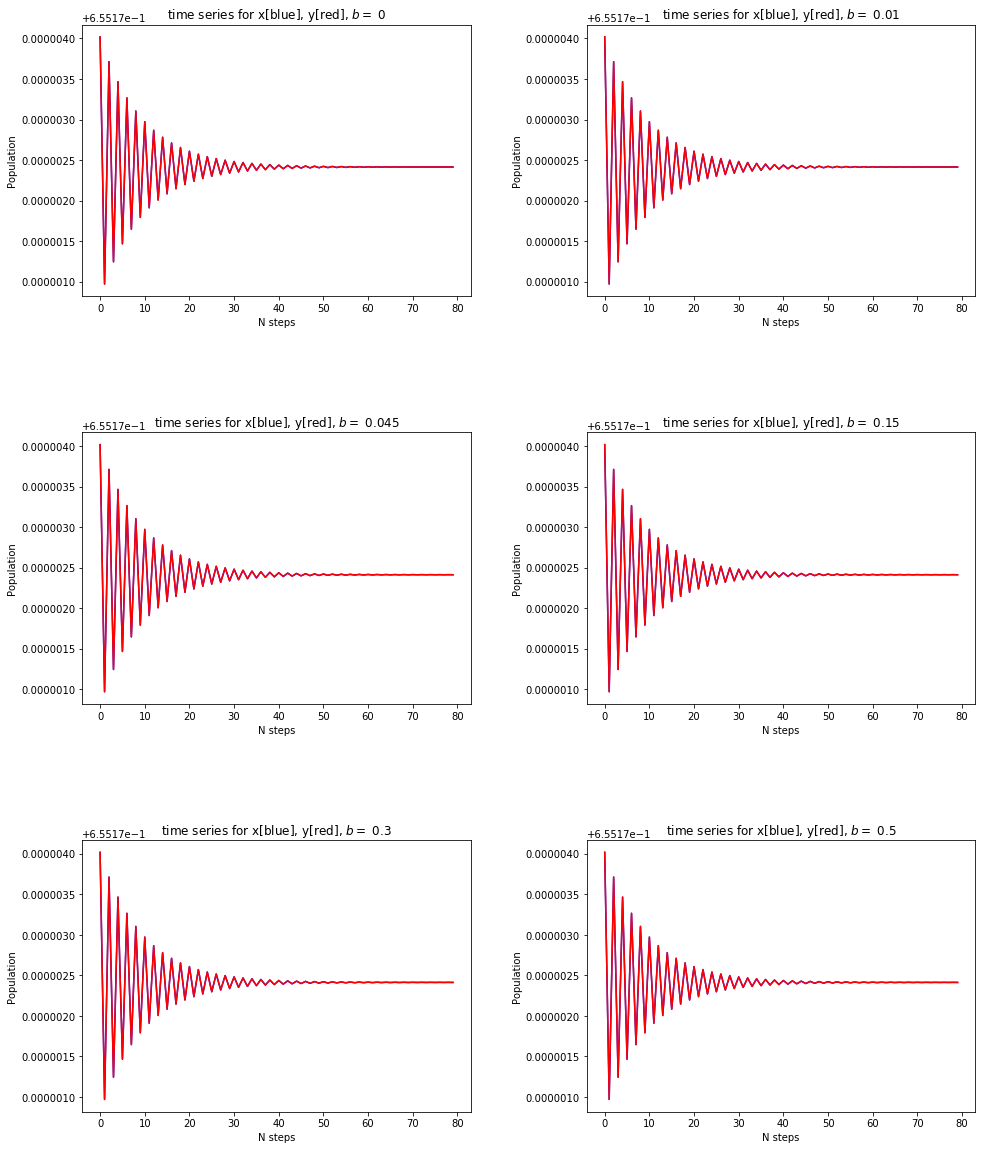

In [41]:
# Raashi's code
import numpy as np
import matplotlib.pyplot as mpp

#define functions 

Lmap = lambda alpha, z: alpha*z*(1-z) #logistic function

#setting up the parameters

a1 = 2.9
# a2 = (a1-1)/a1 #fixed point value
# a2 = 2.9

x0, y0 = 0.5, 0.5
betaValues = [0.0, 0.01, 0.045,0.15,0.3,0.5]

#discard first 100 values
nDiscard = 100
N = 180

#rows and columns of graph (two columns)
nRowSubplot = int(len(betaValues)/2.0) # divide b-value graphs into 2 columns 

# Set plot layout: optimise/modify for best data visualisation
width, height = 16.0, 20.0
mpp.figure (1,(width,height))

numplot = 1



for b in betaValues:
    x =[x0]
    y= [y0]
    
    for n in range (N+1):
        x.append((1.0-b)*Lmap(a1, x[n]) + b*Lmap(a1, y[n]))
        y.append(b*Lmap(a1, x[n]) + (1.0-b)*Lmap(a1, y[n]))

             
    # Data visualization
    mpp.subplot(nRowSubplot, 2, numplot)
    mpp.plot(1*np.array(x[nDiscard+1:N+1]), "b-", 1*np.array(y[nDiscard+1:N+1]), "r-")
    mpp.ylabel("Population"); mpp.xlabel("N steps")
    mpp.title("time series for x[blue], y[red], $b=$ %.3g" %(b, ))
    numplot+=1

mpp.subplots_adjust(hspace=0.5, wspace=0.3)
mpp.show()

In [22]:
x = y = 0.3
alpha = 2.9
beta = 0
lx = alpha*x*(1-x)
ly = alpha*y*(1-y)
next_x = (1-beta)*(lx) + beta*(ly)
next_y = beta*lx + (1-beta)*ly


In [23]:
(next_x, next_y)

(0.609, 0.609)

In [47]:
import numpy as np

# Initializations
init_xy = [(0.1, 0.1), (0.25, 0.25), (0.5, 0.5), (0.75, 0.75), (0.9, 0.9)] # initial x and y value tuples
# init_xy = [(0.3, 0.3)]

alpha = 3.2 # alpha value
# beta = [0, 0.01, 0.045, 0.15, 0.3, 0.5] # beta values
beta = [0.1]

N = 180 # no of iterations
nDiscard = 100 # Discard the first nDiscard iterations


# function to generate nextx and nexty
def get_xy(alpha, beta, x, y):
    """Generates x and y values
    Args:
        (alpha) as alpha value
        (beta) as beta values (coupling parameter)
        (x, y) as the initial values
    Returns:
        next (x, y) values as a tuple"""

    lx = alpha*x*(1-x)
    ly = alpha*y*(1-y)
    next_x = (1-beta)*(lx) + beta*(ly)
    next_y = beta*lx + (1-beta)*ly

    return (next_x, next_y, alpha, beta)

xy_data = []

for x, y in init_xy: # iterate through initial xys

    b_data = [] # initialize data collection for betas

    for b in beta: # iterate through betas

        n_data = [] # initialize data collection for observations
        good_data = []

        for n in range(N): # iterate through no of observations

            next_xy = get_xy(alpha, b, x, y) # get the next xys
            n_data.append(next_xy) # collect x, ys for beta values
            x, y = next_xy[:2] # initialize x and y to the new x and y

            if n > nDiscard-1: # discard the first nDiscard data
                good_data.append(next_xy)
        
        b_data.append(good_data) # collect no of observations for that beta
    
    xy_data.append(b_data) # collect data set of the betas with initial x and ys

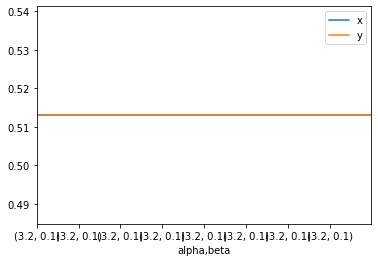

In [48]:
import pandas as pd

df = pd.concat([pd.DataFrame(n, columns=['x', 'y', 'alpha', 'beta']) for b in xy_data for n in b], axis=0)
magnify = 1
df = df.assign(x= x*magnify, y = y*magnify)
df.set_index(['alpha', 'beta']).plot()

In [44]:
(2.9-1)/2.9
df

,x,y,alpha,beta
0,0.655172,0.655172,2.9,0.0
1,0.655172,0.655172,2.9,0.0
2,0.655172,0.655172,2.9,0.0
3,0.655172,0.655172,2.9,0.0
4,0.655172,0.655172,2.9,0.0
...,...,...,...,...
75,0.655172,0.655172,2.9,0.5
76,0.655172,0.655172,2.9,0.5
77,0.655172,0.655172,2.9,0.5
78,0.655172,0.655172,2.9,0.5
